M.S. Financial Data Science Course Project

[Mustafa Gultekin
](https://www.linkedin.com/in/gultekinmustafa/)
 // Universita di Pavia

# Data Collection-Information-Analysis

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the list of tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Fetch stock data from Yahoo Finance
data = {}
for company in tech_list:
    data[company] = yf.download(company, start='2020-12-28', end='2023-12-28')

# Concatenate stock data into a single DataFrame
df = pd.concat([data[company] for company in tech_list], axis=1)
df.columns = [f"{company}_{col}" for company in tech_list for col in data[company].columns]

# Normalize the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df_unscaled = pd.DataFrame(df, columns = df.columns, index = df.index)
df_unscaled.to_csv('price_data.csv', index=True)
# Now you can proceed with the rest of the code for data processing, LSTM model building, and training/validation/testing


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data Information and Analysis

In [ ]:
df_unscaled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-12-28 to 2023-12-27
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AAPL_Open       755 non-null    float64
 1   AAPL_High       755 non-null    float64
 2   AAPL_Low        755 non-null    float64
 3   AAPL_Close      755 non-null    float64
 4   AAPL_Adj Close  755 non-null    float64
 5   AAPL_Volume     755 non-null    int64  
 6   GOOG_Open       755 non-null    float64
 7   GOOG_High       755 non-null    float64
 8   GOOG_Low        755 non-null    float64
 9   GOOG_Close      755 non-null    float64
 10  GOOG_Adj Close  755 non-null    float64
 11  GOOG_Volume     755 non-null    int64  
 12  MSFT_Open       755 non-null    float64
 13  MSFT_High       755 non-null    float64
 14  MSFT_Low        755 non-null    float64
 15  MSFT_Close      755 non-null    float64
 16  MSFT_Adj Close  755 non-null    float64
 17  MSFT_Volume     

In [ ]:
df_corr = df_unscaled.corr()
df_corr.to_csv('price_data_corr.csv', index=True)

#save this as df and add to paper
#interpret results in the paper, say that they are highly correlated, but for the future analysis for exp some of amazon features can be eliminated

In [ ]:
df_corr2 = df_scaled.corr()
df_corr2.to_csv('price_scaled_corr.csv', index=True)

In [ ]:
df_un_st = df_unscaled.head(5)

In [ ]:
df_un_st.to_csv('df_un_st.csv', index=True)


In [ ]:
df_scaled.head(5)

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,...,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,0.189391,0.213835,0.214135,0.248685,0.236922,0.586039,0.036718,0.045559,0.058201,0.079062,...,0.066659,0.074567,0.070327,0.107508,0.736590,0.776998,0.746590,0.786421,0.786421,0.365016
2020-12-29,0.240790,0.232138,0.224409,0.226422,0.215529,0.565973,0.063808,0.046865,0.065543,0.066142,...,0.070028,0.069815,0.065845,0.100980,0.792117,0.799176,0.799066,0.804579,0.804579,0.299978
2020-12-30,0.209520,0.196794,0.212774,0.212355,0.202011,0.422464,0.044491,0.026007,0.042596,0.051860,...,0.057334,0.055324,0.052178,0.136301,0.806992,0.795111,0.799670,0.787323,0.787323,0.167041
2020-12-31,0.190530,0.181015,0.191979,0.199755,0.189905,0.438011,0.024568,0.021304,0.049987,0.061054,...,0.046565,0.059666,0.056272,0.144547,0.775383,0.766977,0.779716,0.773519,0.773519,0.146896
2021-01-04,0.183441,0.166751,0.130586,0.159633,0.151350,0.695825,0.041142,0.022616,0.029238,0.043470,...,0.017266,0.031916,0.030100,0.343838,0.772989,0.761785,0.732728,0.739963,0.739963,0.263100


In [ ]:
df_unscaled.head(12)

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,...,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.317810,124486200,87.581749,89.536400,87.316750,88.804497,...,223.020004,224.960007,219.076462,17933500,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.529388,121047300,89.389503,89.622002,87.804497,87.935997,...,223.580002,224.149994,218.287674,17403200,165.496994,167.532501,164.061005,166.100006,166.100006,97458000
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.399384,96452100,88.100502,88.254753,86.279999,86.975998,...,221.470001,221.679993,215.882263,20272300,167.050003,167.104996,164.123505,164.292496,164.292496,64186000
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.387253,99116600,86.771004,87.946503,86.771004,87.594002,...,219.679993,222.419998,216.602936,20942100,163.750000,164.145996,162.059998,162.846497,162.846497,59144000
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164146,143301900,87.876999,88.032501,85.392502,86.412003,...,214.809998,217.690002,211.996613,37130100,163.500000,163.600006,157.201004,159.331497,159.331497,88228000
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736374,97664900,86.250000,87.383499,85.900749,87.045998,...,215.699997,217.899994,212.201111,23823000,158.300507,161.169006,158.253006,160.925507,160.925507,53110000
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402924,155088000,85.131500,87.400002,84.949997,86.764503,...,211.940002,212.250000,206.698883,35930700,157.324005,159.875504,156.557999,156.919006,156.919006,87896000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647964,109578200,87.002998,89.419998,86.852501,89.362503,...,213.710007,218.289993,212.580917,27694500,157.850006,160.427002,157.750000,158.108002,158.108002,70290000
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758362,105158200,89.399002,90.491997,88.676750,90.360497,...,217.029999,219.619995,213.876144,22956200,159.000000,159.531998,157.110001,159.134995,159.134995,70754000


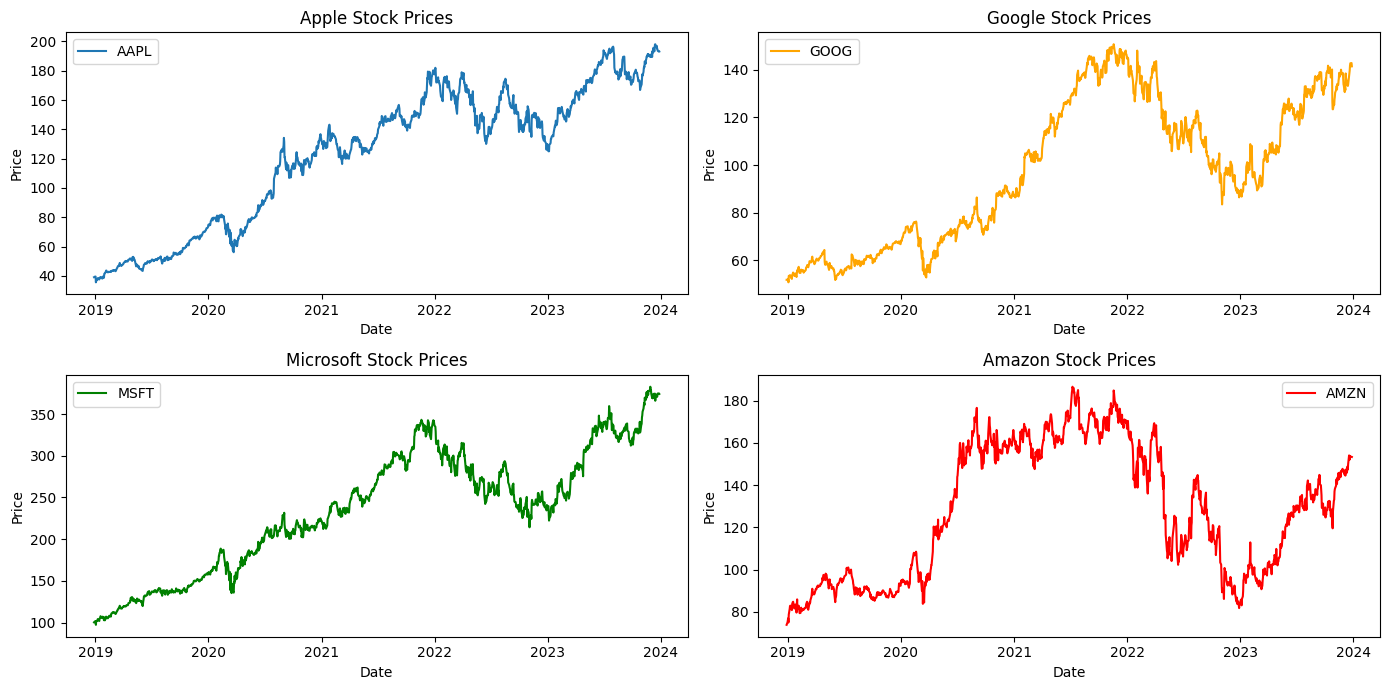

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data, assuming it's in a CSV file for this example
data = pd.read_csv('price_data.csv', parse_dates=['Date'])

# Plot stock prices for each company
plt.figure(figsize=(14, 7))

# Apple
plt.subplot(2, 2, 1)
plt.plot(data['Date'], data['AAPL_Close'], label='AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices')
plt.legend()

# Google
plt.subplot(2, 2, 2)
plt.plot(data['Date'], data['GOOG_Close'], label='GOOG', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Prices')
plt.legend()

# Microsoft
plt.subplot(2, 2, 3)
plt.plot(data['Date'], data['MSFT_Close'], label='MSFT', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Microsoft Stock Prices')
plt.legend()

# Amazon
plt.subplot(2, 2, 4)
plt.plot(data['Date'], data['AMZN_Close'], label='AMZN', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Amazon Stock Prices')
plt.legend()

# Improve layout and show plot
plt.tight_layout()
plt.show()


# Check data scaling

In [ ]:
#check scaling
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Inverse transform the scaled data
df_inverse_transformed = scaler.inverse_transform(df_scaled)

# Convert the inverse transformed data back to a DataFrame for easy comparison
df_inverse_transformed = pd.DataFrame(df_inverse_transformed, columns=df.columns, index=df.index)

# Compare the original and inverse-transformed data
print("Original Data:\n", df_unscaled.head())
print("\nInverse Transformed Data:\n", df_inverse_transformed.head())

# Check if the inverse transformed data is approximately equal to the original data
comparison = df.equals(df_inverse_transformed.round())
df_unscaled.to_csv('unscaled.csv', index=True)
df_inverse_transformed.to_csv('transformed.csv', index=True)

Original Data:
              AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  AAPL_Adj Close  \
Date                                                                         
2020-12-28  133.990005  137.339996  133.509995  136.690002      134.317825   
2020-12-29  138.050003  138.789993  134.339996  134.869995      132.529419   
2020-12-30  135.580002  135.990005  133.399994  133.720001      131.399338   
2020-12-31  134.080002  134.740005  131.720001  132.690002      130.387253   
2021-01-04  133.520004  133.610001  126.760002  129.410004      127.164185   

            AAPL_Volume  GOOG_Open  GOOG_High   GOOG_Low  GOOG_Close  ...  \
Date                                                                  ...   
2020-12-28    124486200  87.581749  89.536400  87.316750   88.804497  ...   
2020-12-29    121047300  89.389503  89.622002  87.804497   87.935997  ...   
2020-12-30     96452100  88.100502  88.254753  86.279999   86.975998  ...   
2020-12-31     99116600  86.771004  87.946503  86.77

In [ ]:
df_scaled.to_csv('scaled.csv', index=True)


In [ ]:
#df_try =  pd.DataFrame(df, columns=df.columns, index=df.index)

In [ ]:
#df_try2 = scaler.fit_transform(df_try)
#df_try3 = pd.DataFrame(df_try2, columns=df_try.columns)

In [ ]:
#df_try3.head(12)

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,...,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
0,0.189391,0.213835,0.214135,0.248685,0.236922,0.586039,0.036718,0.045559,0.058201,0.079062,...,0.066659,0.074567,0.070327,0.107508,0.736590,0.776998,0.746590,0.786421,0.786421,0.365016
1,0.240790,0.232138,0.224409,0.226422,0.215529,0.565973,0.063808,0.046865,0.065543,0.066142,...,0.070028,0.069815,0.065845,0.100980,0.792117,0.799176,0.799066,0.804579,0.804579,0.299978
2,0.209520,0.196794,0.212774,0.212355,0.202012,0.422464,0.044491,0.026007,0.042596,0.051860,...,0.057334,0.055324,0.052178,0.136301,0.806992,0.795111,0.799670,0.787323,0.787323,0.167041
3,0.190530,0.181015,0.191979,0.199755,0.189905,0.438011,0.024568,0.021304,0.049987,0.061054,...,0.046565,0.059666,0.056272,0.144547,0.775383,0.766977,0.779716,0.773519,0.773519,0.146896
4,0.183441,0.166751,0.130586,0.159633,0.151350,0.695825,0.041142,0.022616,0.029238,0.043470,...,0.017266,0.031916,0.030100,0.343838,0.772989,0.761785,0.732728,0.739963,0.739963,0.263100
5,0.124826,0.143146,0.151256,0.179205,0.170157,0.429541,0.016761,0.012715,0.036888,0.052902,...,0.022621,0.033148,0.031262,0.180014,0.723185,0.738671,0.742901,0.755180,0.755180,0.122787
6,0.110014,0.134436,0.125882,0.125260,0.118321,0.764595,0.000000,0.012967,0.022578,0.048714,...,0.000000,0.000000,0.000000,0.329072,0.713831,0.726372,0.726510,0.716932,0.716932,0.261773
7,0.118116,0.141757,0.144201,0.178104,0.169100,0.499053,0.028045,0.043783,0.051214,0.087364,...,0.010649,0.035436,0.033420,0.227676,0.718870,0.731616,0.738037,0.728283,0.728283,0.191429
8,0.169642,0.154380,0.173536,0.191927,0.182382,0.473263,0.063950,0.060137,0.078672,0.102211,...,0.030622,0.043238,0.040779,0.169343,0.729885,0.723106,0.731848,0.738087,0.738087,0.193283
9,0.128624,0.123327,0.152123,0.154373,0.146296,0.445409,0.062519,0.048295,0.068877,0.072093,...,0.028817,0.030742,0.028994,0.170267,0.714564,0.706819,0.716279,0.705395,0.705395,0.204926


In [ ]:
# df_inverse_transformed_try.head(10)

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,...,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.317841,124486200.0,87.581749,89.536400,87.316750,88.804497,...,223.020004,224.960007,219.076492,17933500.0,159.699997,165.199997,158.634506,164.197998,164.197998,113736000.0
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.529404,121047300.0,89.389503,89.622002,87.804497,87.935997,...,223.580002,224.149994,218.287643,17403200.0,165.496994,167.532501,164.061005,166.100006,166.100006,97458000.0
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.399384,96452100.0,88.100502,88.254753,86.279999,86.975998,...,221.470001,221.679993,215.882263,20272300.0,167.050003,167.104996,164.123505,164.292496,164.292496,64186000.0
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.387238,99116600.0,86.771004,87.946503,86.771004,87.594002,...,219.679993,222.419998,216.602921,20942100.0,163.750000,164.145996,162.059998,162.846497,162.846497,59144000.0
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164162,143301900.0,87.876999,88.032501,85.392502,86.412003,...,214.809998,217.690002,211.996597,37130100.0,163.500000,163.600006,157.201004,159.331497,159.331497,88228000.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736374,97664900.0,86.250000,87.383499,85.900749,87.045998,...,215.699997,217.899994,212.201126,23823000.0,158.300507,161.169006,158.253006,160.925507,160.925507,53110000.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402924,155088000.0,85.131500,87.400002,84.949997,86.764503,...,211.940002,212.250000,206.698914,35930700.0,157.324005,159.875504,156.557999,156.919006,156.919006,87896000.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647964,109578200.0,87.002998,89.419998,86.852501,89.362503,...,213.710007,218.289993,212.580902,27694500.0,157.850006,160.427002,157.750000,158.108002,158.108002,70290000.0
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758347,105158200.0,89.399002,90.491997,88.676750,90.360497,...,217.029999,219.619995,213.876129,22956200.0,159.000000,159.531998,157.110001,159.134995,159.134995,70754000.0


In [ ]:
# df_unscaled = pd.DataFrame(df, columns=df.columns, index=df.index)

In [ ]:
# df_unscaled.head(12)

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,...,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.317841,124486200,87.581749,89.536400,87.316750,88.804497,...,223.020004,224.960007,219.076492,17933500,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.529404,121047300,89.389503,89.622002,87.804497,87.935997,...,223.580002,224.149994,218.287643,17403200,165.496994,167.532501,164.061005,166.100006,166.100006,97458000
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.399384,96452100,88.100502,88.254753,86.279999,86.975998,...,221.470001,221.679993,215.882263,20272300,167.050003,167.104996,164.123505,164.292496,164.292496,64186000
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.387238,99116600,86.771004,87.946503,86.771004,87.594002,...,219.679993,222.419998,216.602921,20942100,163.750000,164.145996,162.059998,162.846497,162.846497,59144000
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164162,143301900,87.876999,88.032501,85.392502,86.412003,...,214.809998,217.690002,211.996597,37130100,163.500000,163.600006,157.201004,159.331497,159.331497,88228000
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736374,97664900,86.250000,87.383499,85.900749,87.045998,...,215.699997,217.899994,212.201126,23823000,158.300507,161.169006,158.253006,160.925507,160.925507,53110000
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402924,155088000,85.131500,87.400002,84.949997,86.764503,...,211.940002,212.250000,206.698914,35930700,157.324005,159.875504,156.557999,156.919006,156.919006,87896000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647964,109578200,87.002998,89.419998,86.852501,89.362503,...,213.710007,218.289993,212.580902,27694500,157.850006,160.427002,157.750000,158.108002,158.108002,70290000
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758347,105158200,89.399002,90.491997,88.676750,90.360497,...,217.029999,219.619995,213.876129,22956200,159.000000,159.531998,157.110001,159.134995,159.134995,70754000


In [ ]:
df_scaled.head(12)


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,...,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,0.189391,0.213835,0.214135,0.248685,0.236922,0.586039,0.036718,0.045559,0.058201,0.079062,...,0.066659,0.074567,0.070327,0.107508,0.736590,0.776998,0.746590,0.786421,0.786421,0.365016
2020-12-29,0.240790,0.232138,0.224409,0.226422,0.215529,0.565973,0.063808,0.046865,0.065543,0.066142,...,0.070028,0.069815,0.065845,0.100980,0.792117,0.799176,0.799066,0.804579,0.804579,0.299978
2020-12-30,0.209520,0.196794,0.212774,0.212355,0.202012,0.422464,0.044491,0.026007,0.042596,0.051860,...,0.057334,0.055324,0.052178,0.136301,0.806992,0.795111,0.799670,0.787323,0.787323,0.167041
2020-12-31,0.190530,0.181015,0.191979,0.199755,0.189905,0.438011,0.024568,0.021304,0.049987,0.061054,...,0.046565,0.059666,0.056272,0.144547,0.775383,0.766977,0.779716,0.773519,0.773519,0.146896
2021-01-04,0.183441,0.166751,0.130586,0.159633,0.151350,0.695825,0.041142,0.022616,0.029238,0.043470,...,0.017266,0.031916,0.030100,0.343838,0.772989,0.761785,0.732728,0.739963,0.739963,0.263100
2021-01-05,0.124826,0.143146,0.151256,0.179205,0.170157,0.429541,0.016761,0.012715,0.036888,0.052902,...,0.022621,0.033148,0.031262,0.180014,0.723185,0.738671,0.742901,0.755180,0.755180,0.122787
2021-01-06,0.110014,0.134436,0.125882,0.125260,0.118321,0.764595,0.000000,0.012967,0.022578,0.048714,...,0.000000,0.000000,0.000000,0.329072,0.713831,0.726372,0.726510,0.716932,0.716932,0.261773
2021-01-07,0.118116,0.141757,0.144201,0.178104,0.169100,0.499053,0.028045,0.043783,0.051214,0.087364,...,0.010649,0.035436,0.033420,0.227676,0.718870,0.731616,0.738037,0.728283,0.728283,0.191429
2021-01-08,0.169642,0.154380,0.173536,0.191927,0.182382,0.473263,0.063950,0.060137,0.078672,0.102211,...,0.030622,0.043238,0.040779,0.169343,0.729885,0.723106,0.731848,0.738087,0.738087,0.193283


In [ ]:
# target is the close price for the latest day of X data
# import yfinance as yf
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import save_model
# from tensorflow.keras.models import load_model
# # Define the sequence length
# sequence_length = 7

# # Create sequences for LSTM
# sequences = []
# for i in range(sequence_length, len(df_scaled)):
#     sequences.append(df_scaled.iloc[i - sequence_length:i, :].values)

# # Convert sequences to NumPy array
# sequences = np.array(sequences)

# print("Shape of sequences array:", sequences.shape)
# # Separate features and target
# X = sequences[:, :, [[0, 1, 2, 5], [6, 7, 8, 11], [12, 13, 14, 17],[18, 19,20,23]]]  # Features: Open, High, Low, Volume for each company
# y = sequences[:, -1, [3, 9, 15, 21]]  # Target: Close price for each company

# # Check shapes of X and y
# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)

Shape of sequences array: (1251, 7, 24)
Shape of X: (1251, 7, 4, 4)
Shape of y: (1251, 4)


In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

# Define the sequence length
sequence_length = 28

# Create sequences for LSTM and the corresponding next-day close prices
sequences = []
next_day_close = []  # This will hold the 8th-day close prices as targets
for i in range(sequence_length, len(df_scaled) - 1):  # Adjusted to stop one step earlier
    sequences.append(df_scaled.iloc[i - sequence_length:i, :].values)
    next_day_close.append(df_scaled.iloc[i , [3, 9, 15, 21]].values)  # The 8th day's close prices

# Convert sequences and next day close prices to NumPy arrays
sequences = np.array(sequences)
next_day_close = np.array(next_day_close)

# Separate features and target
X = sequences[:, :, [[0, 1, 2, 5], [6, 7, 8, 11], [12, 13, 14, 17], [18, 19, 20, 23]]]  # Features: Open, High, Low, Volume for each company
y = next_day_close  # Target: 8th day Close price for each company

# Check shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (726, 28, 4, 4)
Shape of y: (726, 4)


In [ ]:
y[0]

array([0.14030583, 0.09004896, 0.024582  , 0.70852165])

In [ ]:
X[1]

array([[[2.40790011e-01, 2.32138264e-01, 2.24408925e-01, 5.65973332e-01],
        [6.38075223e-02, 4.68649650e-02, 6.55428006e-02, 1.95226312e-01],
        [8.24057255e-02, 7.46215835e-02, 7.00276700e-02, 1.00979833e-01],
        [7.92116818e-01, 7.99175604e-01, 7.99065950e-01, 2.99978105e-01]],

       [[2.09520216e-01, 1.96793805e-01, 2.12773792e-01, 4.22464355e-01],
        [4.44914285e-02, 2.60068647e-02, 4.25964528e-02, 1.96728036e-01],
        [7.61116421e-02, 6.54927311e-02, 5.73336464e-02, 1.36301354e-01],
        [8.06992384e-01, 7.95110859e-01, 7.99670343e-01, 1.67040909e-01]],

       [[1.90530472e-01, 1.81014960e-01, 1.91979230e-01, 4.38011278e-01],
        [2.45684771e-02, 2.13043412e-02, 4.99869317e-02, 1.30786679e-01],
        [5.55393562e-02, 5.00029791e-02, 4.65647346e-02, 1.44547269e-01],
        [7.75383158e-01, 7.66976534e-01, 7.79715627e-01, 1.46895761e-01]],

       [[1.83440999e-01, 1.66750822e-01, 1.30585505e-01, 6.95825291e-01],
        [4.11421639e-02, 2.26162

In [ ]:
# Reshape X to the correct dimensions
X_reshaped = X.reshape(X.shape[0], X.shape[1], -1)

# Check the new shape of X
print("New shape of X:", X_reshaped.shape)

New shape of X: (726, 28, 16)


In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 16)))  # 16 features (4 features for each of the 4 companies)
#model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, 16)))  # 16 features (4 features for each of the 4 companies)
#model.add(LSTM(16, activation='relu'))
model.add(Dense(4))  # Output layer with 4 units for each company's close price

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with validation set
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val), verbose=1)
model.save("lstm_model.h5")
model.summary()
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean Squared Error on Test Set: {loss}')
print(f'Mean Absolute Error on Test Set: {mae}')


Epoch 1/40
14/14 [==============================] - 1s 25ms/step - loss: 0.2231 - mae: 0.3747 - val_loss: 0.0594 - val_mae: 0.1917
Epoch 2/40
14/14 [==============================] - 0s 11ms/step - loss: 0.0349 - mae: 0.1432 - val_loss: 0.0213 - val_mae: 0.1120
Epoch 3/40
14/14 [==============================] - 0s 12ms/step - loss: 0.0144 - mae: 0.0957 - val_loss: 0.0109 - val_mae: 0.0828
Epoch 4/40
14/14 [==============================] - 0s 12ms/step - loss: 0.0094 - mae: 0.0776 - val_loss: 0.0079 - val_mae: 0.0716
Epoch 5/40
14/14 [==============================] - 0s 12ms/step - loss: 0.0073 - mae: 0.0682 - val_loss: 0.0067 - val_mae: 0.0661
Epoch 6/40
14/14 [==============================] - 0s 13ms/step - loss: 0.0061 - mae: 0.0623 - val_loss: 0.0056 - val_mae: 0.0598
Epoch 7/40
14/14 [==============================] - 0s 13ms/step - loss: 0.0050 - mae: 0.0557 - val_loss: 0.0051 - val_mae: 0.0561
Epoch 8/40
14/14 [==============================] - 0s 11ms/step - loss: 0.0046 - m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Make predictions
y_pred = model.predict(X_test)


5/5 [==============================] - 0s 3ms/step


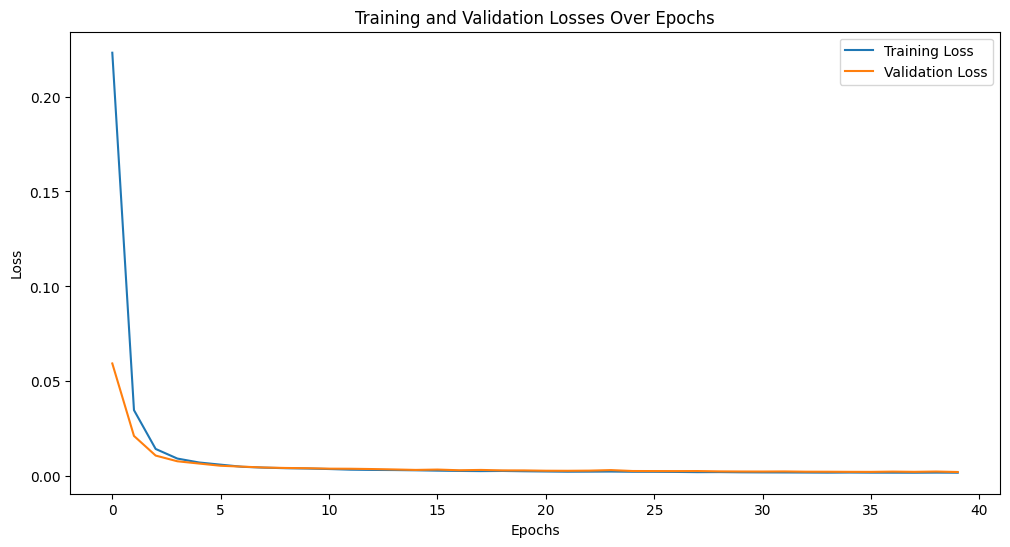

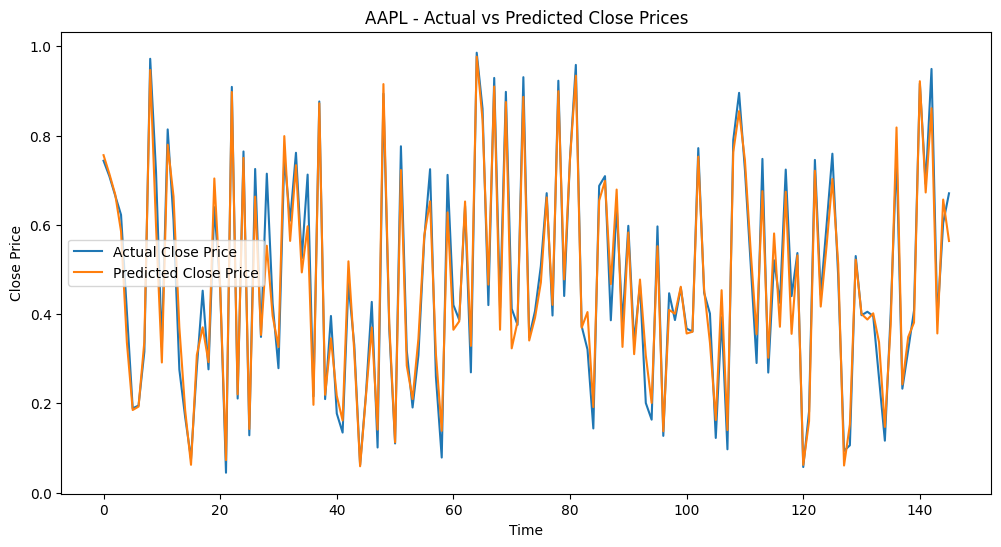

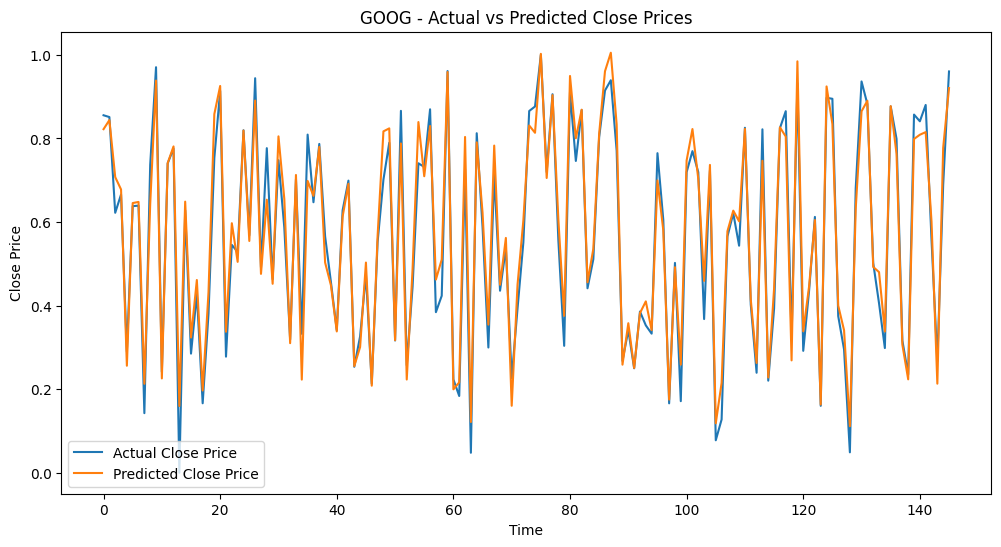

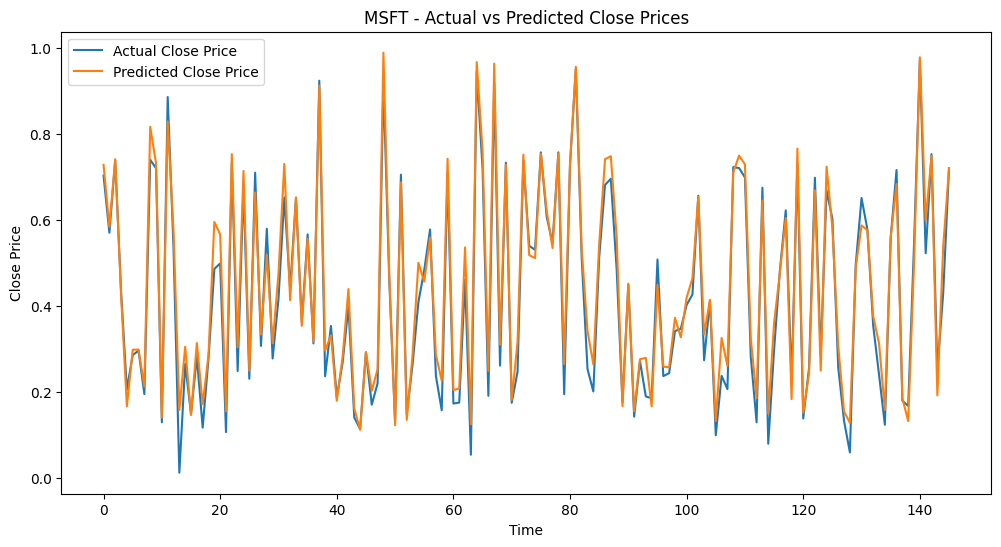

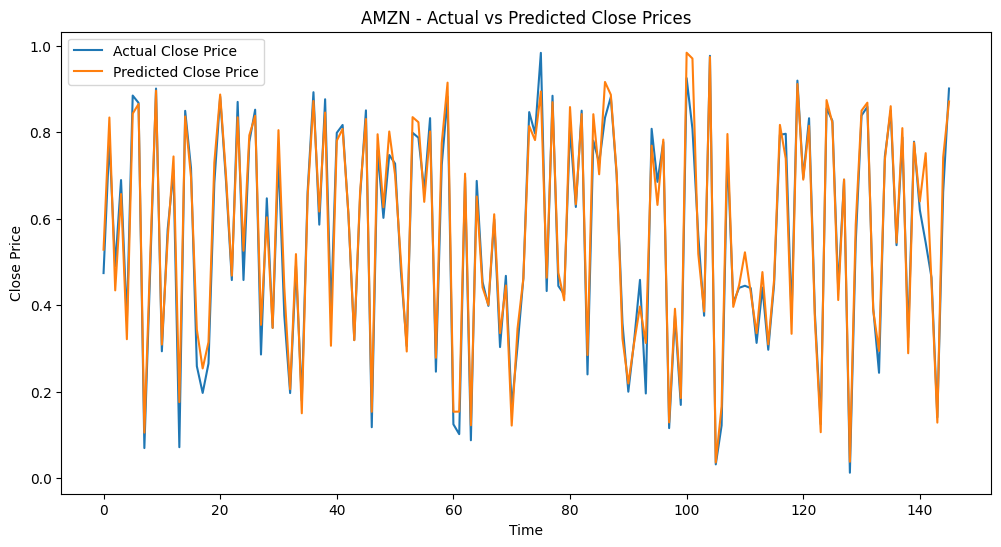

In [ ]:
import matplotlib.pyplot as plt

# Visualize the training process
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to visualize predictions for a specific company
def plot_predictions(y_test, y_pred, company_index, company_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, company_index], label='Actual Close Price')
    plt.plot(y_pred[:, company_index], label='Predicted Close Price')
    plt.title(f'{company_name} - Actual vs Predicted Close Prices')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Visualize predictions for each company
companies = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
for i, company in enumerate(companies):
    plot_predictions(y_test, y_pred, i, company)


In [ ]:
X_test[0]

array([[0.68046583, 0.67293625, 0.68634737, 0.18863327, 0.5572814 ,
        0.55954221, 0.57324563, 0.07910273, 0.46517855, 0.46840225,
        0.47214541, 0.10959385, 0.58534487, 0.5998631 , 0.58572959,
        0.14673155],
       [0.68033931, 0.70373639, 0.69761118, 0.32379668, 0.53645182,
        0.54309682, 0.55315146, 0.10110186, 0.45206589, 0.46433839,
        0.46643002, 0.11144665, 0.57365903, 0.56953239, 0.57393182,
        0.10296879],
       [0.69274588, 0.68795755, 0.70441881, 0.22313466, 0.52596215,
        0.53607929, 0.54336792, 0.07939187, 0.4546885 , 0.45585731,
        0.46408365, 0.09830834, 0.56053647, 0.56373247, 0.57006376,
        0.06025285],
       [0.68363079, 0.67331492, 0.68201507, 0.27014127, 0.52056742,
        0.51029741, 0.51507057, 0.13021513, 0.44717053, 0.44019087,
        0.44290696, 0.13996634, 0.55239465, 0.54794907, 0.54617813,
        0.10154241],
       [0.64134701, 0.62433733, 0.6303998 , 0.26244221, 0.46407272,
        0.45690306, 0.46991535, 

In [ ]:
y_test[0]

array([0.65651374, 0.50893346, 0.39073043, 0.52944856])

Predictions

In [ ]:
# Make predictions
predictions = model.predict(X_test)


5/5 [==============================] - 0s 4ms/step


Unscale predictions

In [ ]:
# Assuming your original scaled dataset (df_scaled) has 24 features (6 features per company times 4 companies)
num_features = df_scaled.shape[1]

# Create an array of zeros with the same shape as the original scaled dataset
dummy_data = np.zeros((predictions.shape[0], num_features))

# Replace the relevant columns with your predictions
# Assuming closing price columns are at the indices [3, 9, 15, 21] as in your original code
dummy_data[:, [3, 9, 15, 21]] = predictions

# Inverse transform the dummy data
predictions_unscaled = scaler.inverse_transform(dummy_data)

# Extract the relevant columns (closing prices)
unscaled_predictions = predictions_unscaled[:, [3, 9, 15, 21]]


In [ ]:
unscaled_predictions

array([[166.5899853 , 114.15855604, 279.13338028, 132.78566078],
       [178.10093097, 130.02650354, 326.41858372, 138.1059803 ],
       [158.45912983, 115.69072649, 282.31654433, 122.52583863],
       [134.37790328, 109.59949205, 253.38042387, 107.92264337],
       [173.80404121, 127.78058362, 319.56754051, 134.1492041 ],
       [164.59305882, 123.81165256, 280.43565972, 148.64261317],
       [149.62822864, 144.45508865, 309.89367947, 169.8470011 ],
       [163.51108517, 107.87959001, 289.43518157, 103.22903307],
       [142.46297749,  94.64391647, 247.43402303,  90.8754486 ],
       [143.03495944, 113.5188599 , 265.93261487, 112.9503605 ],
       [126.63024509, 115.37396548, 251.72744985, 163.03090784],
       [178.46214272, 129.86930998, 327.0827379 , 137.47116063],
       [136.60576188, 103.43167013, 244.05983033, 166.45634294],
       [175.86216854, 142.20279429, 334.4782449 , 166.18931597],
       [122.64351783, 104.2539334 , 237.86555019, 155.67984907],
       [177.82034259, 132

Unscale test data

In [ ]:
# Assuming your original scaled dataset (df_scaled) has 24 features
num_features = df_scaled.shape[1]  # Number of features in the original dataset

# Create an array of zeros with the same shape as the original scaled dataset
dummy_data = np.zeros((y_test.shape[0], num_features))

# Replace the relevant columns with your y_test data
# Assuming the indices for the closing price columns are [3, 9, 15, 21]
dummy_data[:, [3, 9, 15, 21]] = y_test

# Inverse transform the dummy data
y_test_unscaled = scaler.inverse_transform(dummy_data)

# Extract the relevant columns (closing prices)
unscaled_y_test = y_test_unscaled[:, [3, 9, 15, 21]]


In [ ]:
unscaled_y_test

array([[170.02999878, 117.69999695, 278.8500061 , 137.27999878],
       [177.44999695, 130.27000427, 321.85998535, 137.66999817],
       [156.77000427, 116.74649811, 277.3500061 , 116.40699768],
       [138.27000427, 112.68450165, 258.85998535, 112.44000244],
       [175.83999634, 128.92999268, 321.88000488, 134.67999268],
       [162.88000488, 123.25      , 280.72000122, 146.07400513],
       [153.6499939 , 144.21899414, 301.1499939 , 173.15600586],
       [166.47000122, 105.12000275, 288.36999512, 102.30000305],
       [145.47000122,  95.84999847, 256.92001343,  92.48999786],
       [147.03999329, 120.16850281, 267.66000366, 115.54000092],
       [122.76999664, 111.95400238, 239.        , 157.59700012],
       [179.46000671, 131.83000183, 324.04000854, 140.57000732],
       [135.13000488, 104.79450226, 244.49000549, 163.10650635],
       [179.69999695, 144.41650391, 329.01000977, 167.52200317],
       [121.20999908, 101.77749634, 236.47999573, 152.60150146],
       [181.82000732, 132

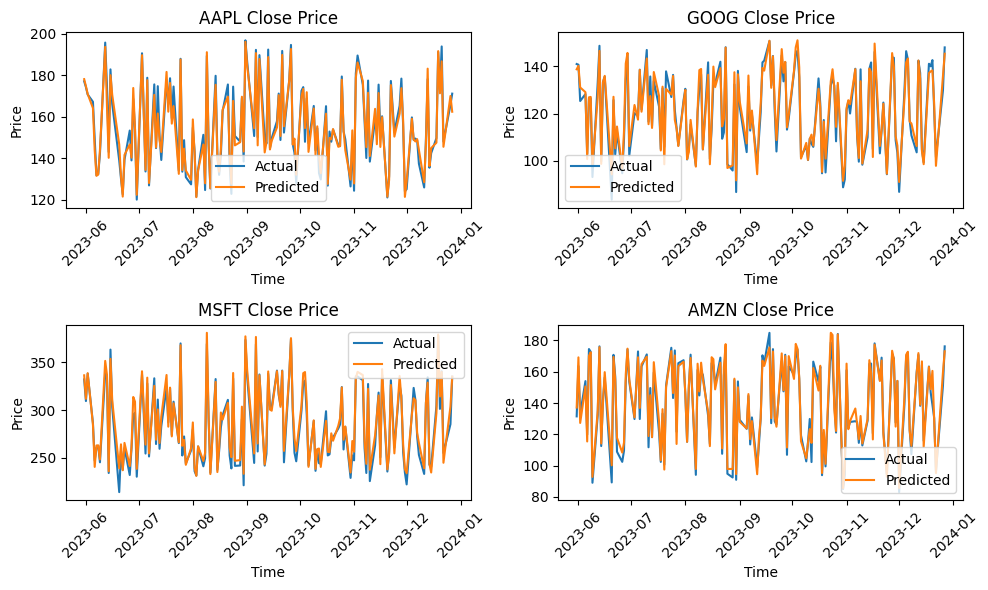

In [ ]:
import matplotlib.pyplot as plt

# Example: Replace these with your actual company names and dates
company_names = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
test_dates = df.index[-len(unscaled_y_test):]  # Extracting the dates from the DataFrame

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(test_dates, unscaled_y_test[:, i], label='Actual')
    plt.plot(test_dates, unscaled_predictions[:, i], label='Predicted')
    plt.title(f'{company_names[i]} Close Price')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.legend()
plt.tight_layout()
plt.show()


Model Evaluation on Unscaled Test and Predicted Data

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Evaluate the model on unscaled data
mse_unscaled = mean_squared_error(unscaled_y_test, unscaled_predictions)
mae_unscaled = mean_absolute_error(unscaled_y_test, unscaled_predictions)

print(f'Unscaled Mean Squared Error: {mse_unscaled}')
print(f'Unscaled Mean Absolute Error: {mae_unscaled}')


Unscaled Mean Squared Error: 24.80488300894833
Unscaled Mean Absolute Error: 3.610891609231887


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_indices = y_true != 0
    # Calculate MAPE
    mape = np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
    return mape

# Calculate MAPE on the unscaled data
#mape_unscaled = mean_absolute_percentage_error(unscaled_y_test, unscaled_predictions)

#print(f'Mean Absolute Percentage Error on Test Set: {mape_unscaled}%')


In [ ]:
mape_ = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Percentage Error on Test Set: {mape_}%')

Mean Absolute Percentage Error on Test Set: 13.118800456516366%


In [ ]:
mape_ = mean_absolute_percentage_error(unscaled_y_test, unscaled_predictions)

print(f'Mean Absolute Percentage Error on Test Set: {mape_}%')

Mean Absolute Percentage Error on Test Set: 2.1503118833450814%


In [ ]:
unscaled_predictions[0]

array([146.50154945, 111.88299355, 254.95924796, 113.18576044])

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE on the unscaled data
mae_unscaled = mean_absolute_error(unscaled_y_test, unscaled_predictions)

print(f'Mean Absolute Error on Test Set: {mae_unscaled}')


Mean Absolute Error on Test Set: 3.610891609231887


Transformer Model Building

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
#mention that we used keras documentation

In [ ]:
# Reshape X to the correct dimensions
X_reshaped = X.reshape(X.shape[0], X.shape[1], -1)

# Check the new shape of X
print("New shape of X:", X_reshaped.shape)

New shape of X: (726, 28, 16)


In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Unscale test data

In [ ]:
# Assuming your original scaled dataset (df_scaled) has 24 features
num_features = df_scaled.shape[1]  # Number of features in the original dataset

# Create an array of zeros with the same shape as the original scaled dataset
dummy_data = np.zeros((y_test.shape[0], num_features))

# Replace the relevant columns with your y_test data
# Assuming the indices for the closing price columns are [3, 9, 15, 21]
dummy_data[:, [3, 9, 15, 21]] = y_test

# Inverse transform the dummy data
y_test_unscaled = scaler.inverse_transform(dummy_data)

# Extract the relevant columns (closing prices)
unscaled_y_test = y_test_unscaled[:, [3, 9, 15, 21]]


In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res


In [ ]:
def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)


    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = Dense(dim, activation='relu')(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(4)(x)  # Predicting 4 values
    return Model(inputs, outputs)

input_shape = X_train.shape[1:]

model_t = build_transformer_model(
    input_shape=input_shape,
    head_size=64,
    num_heads=3,
    ff_dim=32,
    num_blocks=2,
    mlp_units=[128],
    mlp_dropout=0.2,
    dropout=0
)

model_t.compile(optimizer='adam', loss='mse')
model_t.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 16)]             0         []                            
                                                                                                  
 layer_normalization_16 (La  (None, 28, 16)               32        ['input_5[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_8 (Mu  (None, 28, 16)               12880     ['layer_normalization_16[0][0]
 ltiHeadAttention)                                                  ',                            
                                                                     'layer_normalization_16

In [ ]:
history_t = model_t.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
model_t.save("transformer_model.h5")


Epoch 1/50
14/14 [==============================] - 4s 90ms/step - loss: 0.1025 - val_loss: 0.0317
Epoch 2/50
14/14 [==============================] - 1s 45ms/step - loss: 0.0469 - val_loss: 0.0277
Epoch 3/50
14/14 [==============================] - 1s 42ms/step - loss: 0.0397 - val_loss: 0.0269
Epoch 4/50
14/14 [==============================] - 0s 34ms/step - loss: 0.0345 - val_loss: 0.0261
Epoch 5/50
14/14 [==============================] - 0s 34ms/step - loss: 0.0332 - val_loss: 0.0254
Epoch 6/50
14/14 [==============================] - 1s 38ms/step - loss: 0.0330 - val_loss: 0.0263
Epoch 7/50
14/14 [==============================] - 1s 40ms/step - loss: 0.0301 - val_loss: 0.0245
Epoch 8/50
14/14 [==============================] - 0s 35ms/step - loss: 0.0299 - val_loss: 0.0237
Epoch 9/50
14/14 [==============================] - 1s 42ms/step - loss: 0.0303 - val_loss: 0.0251
Epoch 10/50
14/14 [==============================] - 1s 49ms/step - loss: 0.0290 - val_loss: 0.0229
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


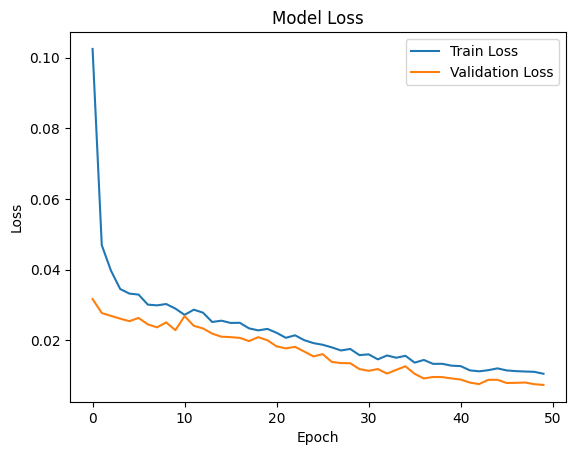

In [ ]:
plt.plot(history_t.history['loss'], label='Train Loss')
plt.plot(history_t.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
predictions_t = model_t.predict(X_test)


5/5 [==============================] - 0s 7ms/step


Transformer Model Evaluation

In [ ]:
# Scaled dataset (df_scaled) has 24 features (6 features per company times 4 companies)
num_features = df_scaled.shape[1]

# Create an array of zeros with the same shape as the original scaled dataset
dummy_data = np.zeros((predictions_t.shape[0], num_features))

# Replace the relevant columns with your predictions
# Closing price columns are at the indices [3, 9, 15, 21] as in your original code
dummy_data[:, [3, 9, 15, 21]] = predictions_t

# Inverse transform the dummy data
predictions_unscaled_t = scaler.inverse_transform(dummy_data)

# Extract the relevant columns (closing prices)
unscaled_predictions_t = predictions_unscaled_t[:, [3, 9, 15, 21]]


In [ ]:
mse = mean_squared_error(unscaled_y_test, unscaled_predictions_t)
mae = mean_absolute_error(unscaled_y_test, unscaled_predictions_t)
print(f'Unscaled Mean Squared Error: {mse}')
print(f'Unscaled Mean Absolute Error: {mae}')


Unscaled Mean Squared Error: 87.0370889572139
Unscaled Mean Absolute Error: 7.252890464635564


In [ ]:
# Assuming you have already inverse transformed your predictions and y_test
mse = mean_squared_error(y_test, predictions_t)
mae = mean_absolute_error(y_test, predictions_t)
print(f'scaled Mean Squared Error: {mse}')
print(f'scaled Mean Absolute Error: {mae}')

scaled Mean Squared Error: 0.00827295932182483
scaled Mean Absolute Error: 0.07235527257172258


In [ ]:
mape_ = mean_absolute_percentage_error(unscaled_y_test, unscaled_predictions_t)

print(f'Mean Absolute Percentage Error on Test Set: {mape_}%')

Mean Absolute Percentage Error on Test Set: 4.353264050448415%


In [ ]:
mape_ = mean_absolute_percentage_error(y_test[:], predictions_t[:])

print(f'Mean Absolute Percentage Error on Test Set: {mape_}%')

Mean Absolute Percentage Error on Test Set: 26.344065767665587%


In [ ]:
unscaled_y_test[:2]

array([[170.02999878, 117.69999695, 278.8500061 , 137.27999878],
       [177.44999695, 130.27000427, 321.85998535, 137.66999817]])

In [ ]:
unscaled_predictions[:2]

array([[153.65045033, 126.98445917, 287.58307406, 154.45369028],
       [178.60281698, 136.20491882, 333.41814014, 145.17068811]])

In [ ]:
mape_try = mean_absolute_percentage_error(unscaled_y_test[:2], unscaled_predictions[:2])


In [ ]:
mape_try

5.926029811180463

In [ ]:
lstm_predictions_flattened = unscaled_predictions.reshape(-1)
transformer_predictions_flattened = unscaled_predictions_t.reshape(-1)

In [ ]:
y_test.shape

(146, 4)

In [ ]:
date_range = pd.date_range(start='2023-05-30', periods=146, freq='B') #data range can be specified in here

In [ ]:
import pandas as pd

# Assuming 'test_data' is your DataFrame containing the test data with dates and stock prices
# Replace 'Date_Column', 'Company1', 'Company2', etc., with your actual column names

test_data = pd.DataFrame({
    'Date': test_dates,  # Adjust the slicing according to your data
    'Apple': unscaled_y_test[:, 0],  # Replace with actual stock prices for Company1
    'Google': unscaled_y_test[:, 1],  # Replace with actual stock prices for Company2
    'Microsoft': unscaled_y_test[:, 2],  # Replace with actual stock prices for Company3
    'Amazon': unscaled_y_test[:, 3]   # Replace with actual stock prices for Company4
})

# Save to CSV
test_data.to_csv('test_data.csv', index=False)


In [ ]:
# Creating a DataFrame
predictions_df = pd.DataFrame({
    'Date': date_range,
    'LSTM_Apple': unscaled_predictions[:, 0],
    'Transformer_Apple': unscaled_predictions_t[:, 0],
    'Apple': test_data['Apple'],
    'LSTM_Google': unscaled_predictions[:, 1],
    'Transformer_Google': unscaled_predictions_t[:, 1],
    'Google': test_data['Google'],
    'LSTM_Microsoft': unscaled_predictions[:, 2],
    'Transformer_Microsoft': unscaled_predictions_t[:, 2],
    'Microsoft': test_data['Microsoft'],
    'LSTM_Amazon': unscaled_predictions[:, 3],
    'Transformer_Amazon': unscaled_predictions_t[:, 3],
    'Amazon': test_data['Amazon']

})

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
unscaled_predictions[0]

array([178.23386255, 138.25245369, 335.48501169, 134.94990728])

In [ ]:
unscaled_predictions_t[0]

array([178.23386255, 138.25245369, 335.48501169, 134.94990728])

In [ ]:
#date correction if needed
data = pd.read_csv('predictions.csv')


In [ ]:
data = pd.read_csv('test_data.csv')
data['Google']

0      140.990005
1      140.699997
2      125.300003
3      128.245499
4      102.970001
          ...    
141    142.650497
142    120.970001
143    101.449997
144    129.796494
145    148.036499
Name: Google, Length: 146, dtype: float64

In [ ]:
data['Date'] = df_scaled.index[-len(X_test):].values

In [ ]:
df_scaled.index[-len(X_test):].values

array(['2023-05-31T00:00:00.000000000', '2023-06-01T00:00:00.000000000',
       '2023-06-02T00:00:00.000000000', '2023-06-05T00:00:00.000000000',
       '2023-06-06T00:00:00.000000000', '2023-06-07T00:00:00.000000000',
       '2023-06-08T00:00:00.000000000', '2023-06-09T00:00:00.000000000',
       '2023-06-12T00:00:00.000000000', '2023-06-13T00:00:00.000000000',
       '2023-06-14T00:00:00.000000000', '2023-06-15T00:00:00.000000000',
       '2023-06-16T00:00:00.000000000', '2023-06-20T00:00:00.000000000',
       '2023-06-21T00:00:00.000000000', '2023-06-22T00:00:00.000000000',
       '2023-06-23T00:00:00.000000000', '2023-06-26T00:00:00.000000000',
       '2023-06-27T00:00:00.000000000', '2023-06-28T00:00:00.000000000',
       '2023-06-29T00:00:00.000000000', '2023-06-30T00:00:00.000000000',
       '2023-07-03T00:00:00.000000000', '2023-07-05T00:00:00.000000000',
       '2023-07-06T00:00:00.000000000', '2023-07-07T00:00:00.000000000',
       '2023-07-10T00:00:00.000000000', '2023-07-11

In [ ]:
data.head(5)

,Date,LSTM_Apple,LSTM_Google,LSTM_Microsoft,LSTM_Amazon,Transformer_Apple,Transformer_Google,Transformer_Microsoft,Transformer_Amazon
0,2023-05-31,179.294474,138.052734,336.993074,135.706921,179.294474,138.052734,336.993074,135.706921
1,2023-06-01,176.618784,139.281916,310.232086,166.094987,176.618784,139.281916,310.232086,166.094987
2,2023-06-02,170.845711,128.716862,338.381019,128.368699,170.845711,128.716862,338.381019,128.368699
3,2023-06-05,164.219724,126.818071,283.176022,148.995090,164.219724,126.818071,283.176022,148.995090
4,2023-06-06,144.357129,99.379701,239.560473,115.221929,144.357129,99.379701,239.560473,115.221929


In [ ]:
data.to_csv('predictions.csv', index=False)

In [ ]:
unscaled_predictions.shape

(149, 4)

Streamlit App Development

In [ ]:
!pip install -q streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


You can edit your app file in below or just add your python file.

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Function to load predictions and test data
@st.cache
def load_data():
    predictions = pd.read_csv('predictions.csv')  # Replace with your predictions CSV file path
    test_data = pd.read_csv('test_data.csv')  # Replace with your test data CSV file path
    return predictions, test_data

# Load data
predictions, test_data = load_data()

# Streamlit UI
st.title('Stock Price Prediction App')

# Display Data
st.subheader('Predictions')
st.write(predictions)

# Visualization
st.subheader('Visualization')
selected_company = st.selectbox('Select a Company', ['Company1', 'Company2', 'Company3', 'Company4'])  # Replace with actual company names

if st.button('Show Prediction Plot'):
    fig, ax = plt.subplots()
    ax.plot(test_data['Date'], test_data[selected_company], label='Actual Price')
    ax.plot(predictions['Date'], predictions[f'LSTM_{selected_company}'], label='LSTM Predictions')
    ax.plot(predictions['Date'], predictions[f'Transformer_{selected_company}'], label='Transformer Predictions')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predictions for {selected_company}')
    plt.legend()
    st.pyplot(fig)



Writing app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 4.114s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run /content/app.py --client.showErrorDetails=false &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.78s
your url is: https://pink-adults-prove.loca.lt
^C
